# Preeliminares y Redes Bayesianas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="400px" height="300px" />

> Con el repaso de probabilidad que vimos la clase pasada estamos listos para comenzar nuestro camino de aprendizaje de los modelos gráficos probabilísticos. Esta clase revisaremos un par de conceptos matemáticos preeliminares, y finalmente veremos los fundamentos de uno de los dos modelos probabilísticos que estudiaremos: las **Redes Bayesianas**.

> **Objetivos:**
> - Entender el concepto de factor y las operaciones que podemos desarrollar con estos elementos.
> - Aprender qué es una red Bayesiana y cómo se factorizan distribuciones sobre ellas.
> - Entender el flujo de probabilidad que codifica una red Bayesiana y las independencias que implica.
> - Estudiar el modelo Naïve Bayes, y sus implicaciones de independencia.

> **Referencias:**
> 
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Cap. 3.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Cap. 1.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg.</p>

___

# 0. Recorderis

En la clase pasada vimos una extensa motivación de qué son y porqué usar modelos gráficos probabilísticos. Segregando cada palabra de este nombre:

- Modelo: construimos un modelo a partir de la experiencia de un experto y de los datos para modelar la situación que estamos enfrentando. El modelo es un ente por sí solo, y contiene todo nuestro conocimiento acerca del fenómeno sobre el que estamos razonando: las variables que involucra y cómo interactúan entre ellas. Entonces separamos el modelo de los algoritmos que usamos para razonar sobre él.

- Probabilísitico: hablamos que casi todas las aplicaciones reales tenían algún tipo de incertidumbre involucrada (observación parcial, ruido de medición, incluso dudamos de que el mundo sea determinista). Por tanto, la probabildiad es un enfoque que nos permite incorporar esta incertidumbre dentro del modelo y nos da herramientas para trabajar con la incertidumbre.

- Gráfico: finalmente, discutimos que codificar una distribución conjunta es una tarea compleja. En el caso más sencillo en el que tenemos $k$ VA binarias, necesitaríamos $2^k$ parámetros para especificar completamente la distribución conjunta. Por tanto, explotamos la teoría de grafos para codificar y manipular este tipo de distribuciones de manera efectiva.

Concluimos entonces que el uso de las representaciones gráficas está justificado por:

- Son una estructura de datos intuitiva y compacta para capturar las distribuciones de alta dimensionalidad.

- Nos permiten razonar de forma eficiente usando algoritmos que explotan la estructura gráfica.

- En ciertas ocasiones, tenemos una parametrización "*sparse*", lo que nos permite representar distribuciones grandes con un número pequeño de parámetros.

- Podemos adquirir conocimiento de expertos.

- Nos permite aprender los parámetros de manera robusta a partir de datos.

# 1. Preeliminares

## 1.1. Ejemplo

Consideramos el caso de un estudiante dentro de un curso. Queremos razonar acerca de 
   - la $I$(nteligencia) del estudiante,
   - la $D$(ificultad) del curso,
   - la $C$(alificación) del estudiante dentro del curso,
   - el $P$(untaje) en las pruebas estatales, y
   - una carta de $R$(ecomendación) laboral que emite el profesor del curso acerca del estudiante.

Consideramos una discretización de las anteriores variables como sigue:
- $\mathrm{Val}(I)=\{i^0, i^1\}$, donde $i^0$ representa baja inteligencia e $i^1$ representa alta inteligencia;
- $\mathrm{Val}(D)=\{d^0, d^1\}$, donde $d^0$ representa fácil y $d^1$ representa difícil;
- $\mathrm{Val}(C)=\{c^0, c^1, c^2\}$, donde $c^0$ representa calificación baja ($< 6$), $c^1$ representa calificación media ($\geq 6$, $< 9$) y $c^2$ representa calificación alta ($\geq 9$);
- $\mathrm{Val}(P)=\{p^0, p^1\}$, donde $p^0$ representa mal puntaje y $p^1$ representa alto puntaje;
- $\mathrm{Val}(R)=\{r^0, r^1\}$, donde $r^0$ representa una carta de recomendación débil y $r^1$ representa una carta de recomendación fuerte.

**Pregunta.** De no usar modelos gráficos probabilísticos, ¿cuántos parámetros necesitamos para especificar por completo la distribución sobre las cinco variables mencionadas?

*Respuesta:* Necesitaríamos $2 \times 2 \times 3 \times 2 \times 2 -1 = 48 - 1 = 47$ parámetros.

Por otra parte, pensando en la **causalidad** de la situación, podríamos plantear la siguiente Red Bayesiana para modelar el ejemplo anterior:

In [1]:
from IPython.display import Image

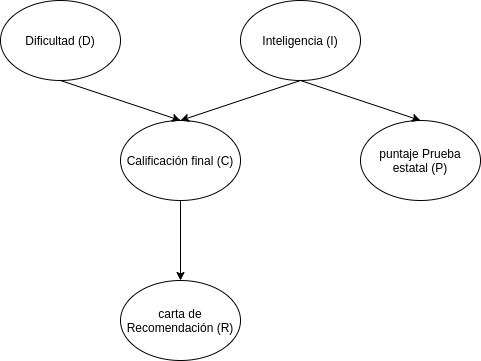

In [2]:
Image(filename='figures/Student.png')

Al final de esta clase, entenderemos cómo codificar la distribución de las variables sobre esta red, y apartir de ello, porqué este modelo necesita muchos menos parámetros que el modelo genérico (distribución conjunta).

## 1.2. Distribuciones de probabilidad y sus operaciones

Consideremos el ejemplo del estudiante, esta vez reducido a las variables $I$, $D$ y $C$.

Una distribución conjunta, $P(I,D,C)$, sobre estas tres variables es:

|  $I$  |  $D$  |  $C$  |  $P$  |
| ----- | ----- | ----- | ----- |
| $i^0$ | $d^0$ | $c^0$ | 0.126 |
| $i^0$ | $d^0$ | $c^1$ | 0.168 |
| $i^0$ | $d^0$ | $c^2$ | 0.126 |
| $i^0$ | $d^1$ | $c^0$ | 0.126 |
| $i^0$ | $d^1$ | $c^1$ | 0.045 |
| $i^0$ | $d^1$ | $c^2$ | 0.009 |
| $i^1$ | $d^0$ | $c^0$ | 0.0056|
| $i^1$ | $d^0$ | $c^1$ | 0.0224|
| $i^1$ | $d^0$ | $c^2$ | 0.252 |
| $i^1$ | $d^1$ | $c^0$ | 0.024 |
| $i^1$ | $d^1$ | $c^1$ | 0.036 |
| $i^1$ | $d^1$ | $c^2$ | 0.06  |

**Pregunta.** ¿Cuántos parámetros en total?

*Respuesta:* $2 \times 2 \times 3 = 12$

In [3]:
# Importamos pgmpy.factors.discrete.JointProbabilityDistribution
from pgmpy.factors.discrete import JointProbabilityDistribution as joint

In [4]:
# help JointProbabilityDistribution
joint?

In [9]:
# Crear la distribución conjunta
P_IDC = joint(variables=["I", "D", "C"],
              cardinality=[2, 2, 3],
              values=[0.126, 0.168, 0.126, 0.126, 0.045, 0.009, 0.0056, 0.0224, 0.252, 0.024, 0.036, 0.06])

In [10]:
print(P_IDC)

+------+------+------+------------+
| I    | D    | C    |   P(I,D,C) |
+======+======+======+============+
| I(0) | D(0) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(0) | C(1) |     0.1680 |
+------+------+------+------------+
| I(0) | D(0) | C(2) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(1) |     0.0450 |
+------+------+------+------------+
| I(0) | D(1) | C(2) |     0.0090 |
+------+------+------+------------+
| I(1) | D(0) | C(0) |     0.0056 |
+------+------+------+------------+
| I(1) | D(0) | C(1) |     0.0224 |
+------+------+------+------------+
| I(1) | D(0) | C(2) |     0.2520 |
+------+------+------+------------+
| I(1) | D(1) | C(0) |     0.0240 |
+------+------+------+------------+
| I(1) | D(1) | C(1) |     0.0360 |
+------+------+------+------------+
| I(1) | D(1) | C(2) |     0.0600 |
+------+------+------+------------+


In [12]:
# Verificar que la distribución es válida
P_IDC.values.sum()

1.0

Entonces, tenemos que para cualquier distribución sobre un conjunto de variables $\bar{X}$:

$$\sum_{\bar{x}\in\mathrm{Val}(\bar{X})} P(\bar{X}=\bar{x}) = 1.$$

> **Independencia de parámetros:** son parámetros independientes aquellos cuyo valor no está completamente determinado por el valor de otros parámetros.

En este caso, la distribución se determina con 12 parámetros. Sin embargo, la suma de todos ellos debe ser uno (1). Por tanto, *sólo hay 11 parámetros independientes*.

### ¿Qué operaciones podemos llevar a cabo sobre una distribucción?

**1. Reducción**

Supongamos que observamos que la calificación final del estudiante es alta, esto es, $C=c^2$. La operación de *reducción* consiste en eliminar todas las filas que no son consistentes con la observación:

In [13]:
# help método reduce
P_IDC.reduce?

In [14]:
# Operación de reducción C=c2
P_IDc2 = P_IDC.reduce(values=[('C', 2)], inplace=False)

In [15]:
P_IDc2

<Joint Distribution representing P(I:2, D:2) at 0x7fe79f6cd910>

In [16]:
print(P_IDc2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.1260 |
+------+------+----------+
| I(0) | D(1) |   0.0090 |
+------+------+----------+
| I(1) | D(0) |   0.2520 |
+------+------+----------+
| I(1) | D(1) |   0.0600 |
+------+------+----------+


In [18]:
P_IDc2.values.sum()

0.447

Matemáticamente, esta operación equivale a considerar la distribución evaluada $P(I, D, C=c^2) = P(I, D, c^2)$.

**Pregunta**. ¿Es este resultado una distribución de probabilidad sobre las variables $I,D$?

*Respuesta:* No.

**2. Condición**

A partir de la operación de reducción, si queremos obtener una distribución legítima sobre las variables que no reducimos, debemos dividir sobre la suma:

In [19]:
# help método conditional_distribution
P_IDC.conditional_distribution?

In [20]:
# Operación de condición sobre C=c2
P_ID_given_c2 = P_IDC.conditional_distribution(values=[('C', 2)], inplace=False)

In [21]:
P_ID_given_c2

<Joint Distribution representing P(I:2, D:2) at 0x7fe79f485890>

In [22]:
print(P_ID_given_c2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.2819 |
+------+------+----------+
| I(0) | D(1) |   0.0201 |
+------+------+----------+
| I(1) | D(0) |   0.5638 |
+------+------+----------+
| I(1) | D(1) |   0.1342 |
+------+------+----------+


In [23]:
P_IDc2.values / P_IDc2.values.sum()

array([[0.28187919, 0.02013423],
       [0.56375839, 0.13422819]])

In [25]:
P_ID_given_c2.values.sum()

1.0

Matemáticamente, esta operación equivale a considerar la distribución condicionada $P(I, D| C=c^2) = P(I, D| c^2)$.

**Pregunta**. ¿Es este resultado una distribución de probabilidad sobre las variables $I,D$?

*Respuesta:* Si.

**3. Marginalización**

Cuando tenemos una distribución de probabilidad sobre un conjunto de variables, y producimos una sobre un subconjunto de las variables originales. Por ejemplo, queremos la distribución marginal sobre $I, D$:

In [26]:
# Imprimir distribución inicial
print(P_IDC)

+------+------+------+------------+
| I    | D    | C    |   P(I,D,C) |
+======+======+======+============+
| I(0) | D(0) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(0) | C(1) |     0.1680 |
+------+------+------+------------+
| I(0) | D(0) | C(2) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(1) |     0.0450 |
+------+------+------+------------+
| I(0) | D(1) | C(2) |     0.0090 |
+------+------+------+------------+
| I(1) | D(0) | C(0) |     0.0056 |
+------+------+------+------------+
| I(1) | D(0) | C(1) |     0.0224 |
+------+------+------+------------+
| I(1) | D(0) | C(2) |     0.2520 |
+------+------+------+------------+
| I(1) | D(1) | C(0) |     0.0240 |
+------+------+------+------------+
| I(1) | D(1) | C(1) |     0.0360 |
+------+------+------+------------+
| I(1) | D(1) | C(2) |     0.0600 |
+------+------+------+------------+


In [27]:
# help método marginalize
P_IDC.marginalize?

In [28]:
# Marginalizar C
P_ID = P_IDC.marginalize(variables=["C"], inplace=False)

In [29]:
print(P_ID)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.4200 |
+------+------+----------+
| I(0) | D(1) |   0.1800 |
+------+------+----------+
| I(1) | D(0) |   0.2800 |
+------+------+----------+
| I(1) | D(1) |   0.1200 |
+------+------+----------+


Y si queremos la marginal sobre $I$ nada más:

In [30]:
# Marginalizar C y D
P_I = P_IDC.marginalize(variables=["C", "D"], inplace=False)

In [31]:
print(P_I)

+------+--------+
| I    |   P(I) |
+======+========+
| I(0) | 0.6000 |
+------+--------+
| I(1) | 0.4000 |
+------+--------+


Matemáticamente, las anteriores operaciones equivalen a:

$$P(I, D) = \sum_{c\in\mathrm{Val}(C)} P(I, D, C=c), \text{ y }$$

$$P(I) = \sum_{(c,d)\in\mathrm{Val}(C,D)} P(I, D=d, C=c).$$

En abuso de la notación, para no hacer engorrosa la escritura, las anteriores sumas se expresan comúnmente como:

$$P(I, D) = \sum_{C} P(I, D, C), \text{ y }$$

$$P(I) = \sum_{C,D} P(I, D, C).$$

## 1.3. Factores

La manera en que formalizamos esto matemáticamente es através de la noción de factores:

> *Definición.* Un **factor** $\phi(X_1, \dots, X_k)$ es una función que toma un conjunto de VA $X_1, \dots, X_k$ y devuelve un valor real no negativo:
> 
> $$\phi: \mathrm{Val}(X_1, \dots, X_k) \to \mathbb{R}_{\geq 0}.$$
>
> El conjunto de variables $\{X_1, \dots, X_k\}$ se le llama el **alcance** del factor $\phi$, y se denota como $\mathrm{alcance}[\phi]=\{X_1, \dots, X_k\}.$

Los factores son el bloque constructor fundamental para definir distribuciones en espacios con alta dimensión. Además, aplican tanto en redes Bayesianas como en redes de Markov.

**Ejemplos:**

- Una distribución conjunta: $\phi_1(I, D, C) = P(I, D, C)$; $\mathrm{alcance}[\phi_1]=\{I, D, C\}$.

- Una medida sin normalizar: $\phi_2(I, D) = P(I, D, c^2)$; $\mathrm{alcance}[\phi_2]=\{I, D\}$.

- Una distribución condicional: $\phi_3(I, D, C) = P(I, D | C)$; $\mathrm{alcance}[\phi_3]=\{I, D, C\}$. Para cada valor de C tenemos una distribución sobre $I,D$.

**Nota:** los factores no son necesariamente probabilidades.

In [32]:
# Hallar distribución condicional
P_ID_given_c0 = P_IDC.conditional_distribution(values=[("C", 0)], inplace=False)
P_ID_given_c1 = P_IDC.conditional_distribution(values=[("C", 1)], inplace=False)

In [33]:
print(P_ID_given_c0)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.4474 |
+------+------+----------+
| I(0) | D(1) |   0.4474 |
+------+------+----------+
| I(1) | D(0) |   0.0199 |
+------+------+----------+
| I(1) | D(1) |   0.0852 |
+------+------+----------+


In [34]:
print(P_ID_given_c1)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.6190 |
+------+------+----------+
| I(0) | D(1) |   0.1658 |
+------+------+----------+
| I(1) | D(0) |   0.0825 |
+------+------+----------+
| I(1) | D(1) |   0.1326 |
+------+------+----------+


In [35]:
print(P_ID_given_c2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.2819 |
+------+------+----------+
| I(0) | D(1) |   0.0201 |
+------+------+----------+
| I(1) | D(0) |   0.5638 |
+------+------+----------+
| I(1) | D(1) |   0.1342 |
+------+------+----------+


### Operaciones entre factores

**1. Producto de factores**

$$\phi_1(A, B)$$

|   A   |   B   | $\phi_1$ |
| ----- | ----- | -------- |
| $a^0$ | $b^0$ | 5        |
| $a^0$ | $b^1$ | 8        |
| $a^1$ | $b^0$ | 1        |
| $a^1$ | $b^1$ | 0        |
| $a^2$ | $b^0$ | 3        |
| $a^2$ | $b^1$ | 9        |

$$\phi_2(B, C)$$

|   B   |   C   | $\phi_1$ |
| ----- | ----- | -------- |
| $b^0$ | $c^0$ | 5        |
| $b^0$ | $c^1$ | 7        |
| $b^1$ | $c^0$ | 1        |
| $b^1$ | $c^1$ | 2        |

$$\phi_3(A, B, C) = \phi_1(A, B) \times \phi_2(B, C)$$

|   A   |   B   |   C   | $\phi_3$ |
| ----- | ----- | ----- | ---------------- |
| $a^0$ | $b^0$ | $c^0$ | $5\times 5 = 25$ |
| $a^0$ | $b^0$ | $c^1$ | $5\times 7 = 35$ |
| $a^0$ | $b^1$ | $c^0$ | $8\times 1 = 8$  |
| $a^0$ | $b^1$ | $c^1$ | $8\times 2 = 16$ |
| $a^1$ | $b^0$ | $c^0$ | $1\times 5 = 5$  |
| $a^1$ | $b^0$ | $c^1$ | $1\times 7 = 7$  |
| $a^1$ | $b^1$ | $c^0$ | $0\times 1 = 0$  |
| $a^1$ | $b^1$ | $c^1$ | $0\times 2 = 0$  |
| $a^2$ | $b^0$ | $c^0$ | $3\times 5 = 15$ |
| $a^2$ | $b^0$ | $c^1$ | $3\times 7 = 21$ |
| $a^2$ | $b^1$ | $c^0$ | $9\times 1 = 9$  |
| $a^2$ | $b^1$ | $c^1$ | $9\times 2 = 18$ |

In [36]:
# Importamos pgmpy.factors.discrete.DiscreteFactor
from pgmpy.factors.discrete import DiscreteFactor

In [37]:
# help DiscreteFactor
DiscreteFactor?

In [38]:
# Factores phi1, phi2
phi1 = DiscreteFactor(variables=["A", "B"],
                      cardinality=[3, 2],
                      values=[5, 8, 1, 0, 3, 9])
phi2 = DiscreteFactor(variables=["B", "C"],
                      cardinality=[2, 2],
                      values=[5, 7, 1,2])

In [39]:
# Producto de factores
phi3 = phi1 * phi2
# phi3 = phi1.product(phi2)

In [40]:
print(phi3)

+------+------+------+--------------+
| A    | B    | C    |   phi(A,B,C) |
+======+======+======+==============+
| A(0) | B(0) | C(0) |      25.0000 |
+------+------+------+--------------+
| A(0) | B(0) | C(1) |      35.0000 |
+------+------+------+--------------+
| A(0) | B(1) | C(0) |       8.0000 |
+------+------+------+--------------+
| A(0) | B(1) | C(1) |      16.0000 |
+------+------+------+--------------+
| A(1) | B(0) | C(0) |       5.0000 |
+------+------+------+--------------+
| A(1) | B(0) | C(1) |       7.0000 |
+------+------+------+--------------+
| A(1) | B(1) | C(0) |       0.0000 |
+------+------+------+--------------+
| A(1) | B(1) | C(1) |       0.0000 |
+------+------+------+--------------+
| A(2) | B(0) | C(0) |      15.0000 |
+------+------+------+--------------+
| A(2) | B(0) | C(1) |      21.0000 |
+------+------+------+--------------+
| A(2) | B(1) | C(0) |       9.0000 |
+------+------+------+--------------+
| A(2) | B(1) | C(1) |      18.0000 |
+------+----

**2. Marginalización**

**3. Reducción**

**Nota:** Los factores no están obligados a sumar uno. Por eso no hay operación de condición en factores.

### Actividad

1. Sean $\phi_1$ y $\phi_2$ los siguientes factores

$$\phi_1(X, Y)$$

|   X   |   Y   | $\phi_1$ |
| ----- | ----- | -------- |
| $x^0$ | $y^0$ | 0.8      |
| $x^0$ | $y^1$ | 0.5      |
| $x^1$ | $y^0$ | 0.5      |
| $x^1$ | $y^1$ | 0.6      |

$$\phi_2(Y, Z)$$

|   Y   |   Z   | $\phi_2$ |
| ----- | ----- | -------- |
| $y^0$ | $z^0$ | 0.2      |
| $y^0$ | $z^1$ | 0.2      |
| $y^1$ | $z^0$ | 0.9      |
| $y^1$ | $z^1$ | 1.0      |

Si $\psi(X,Y,Z) = \phi_1(X, Y) \phi_2(Y,Z)$
- $\psi(x^0, y^0, z^0)=$
- $\psi(x^0, y^1, z^1)=$
- $\psi(x^1, y^1, z^1)=$

2. Sea $\phi_1$ el siguiente factor

$$\phi_1(X, Y, Z)$$

|   X   |   Y   |   Z   | $\phi_1$ |
| ----- | ----- | ----- | -------- |
| $x^0$ | $y^0$ | $z^0$ | 10       |
| $x^0$ | $y^0$ | $z^1$ | 5        |
| $x^0$ | $y^1$ | $z^0$ | 15       |
| $x^0$ | $y^1$ | $z^1$ | 16       |
| $x^1$ | $y^0$ | $z^0$ | 14       |
| $x^1$ | $y^0$ | $z^1$ | 30       |
| $x^1$ | $y^1$ | $z^0$ | 2        |
| $x^1$ | $y^1$ | $z^1$ | 8        |

Si $\psi(X,Z) = \phi_1(X, y^1, Z)$

- $\psi(x^0, z^0)=$
- $\psi(x^0, z^1)=$
- $\psi(x^1, z^1)=$

3. Sea $\phi_1$ el siguiente factor

$$\phi_1(X, Y, Z)$$

|   X   |   Y   |   Z   | $\phi_1$ |
| ----- | ----- | ----- | -------- |
| $x^0$ | $y^0$ | $z^0$ | 10       |
| $x^0$ | $y^0$ | $z^1$ | 5        |
| $x^0$ | $y^1$ | $z^0$ | 15       |
| $x^0$ | $y^1$ | $z^1$ | 16       |
| $x^1$ | $y^0$ | $z^0$ | 14       |
| $x^1$ | $y^0$ | $z^1$ | 30       |
| $x^1$ | $y^1$ | $z^0$ | 2        |
| $x^1$ | $y^1$ | $z^1$ | 8        |

Si $\psi(Y,Z) = \sum_{X}\phi_1(X, Y, Z)$

- $\psi(y^0, z^0)=$
- $\psi(y^0, z^1)=$
- $\psi(y^1, z^1)=$

___
# 2. Fundamentos de Redes Bayesianas

## 2.1. Semántica y factorización.

Consideremos, de nuevo, el ejemplo del estudiante <font color=green> Ver en el tablero y discutir modelamiento a partir de las variables </font>

Ahora, con las distribuciones condiconales:

In [ ]:
Image(filename='figures/Student1.png')

- Como vimos antes, este modelo se produjo pensando en las dependencias de las VA.

- Se modela cada nodo con una distribución condicional.

Cuando todas las distribuciones condicionales están especificadas, tenemos una red Bayesiana completamente parametrizada, capaz de producir una distribución conjunta sobre todas las VA.

¿Cómo? Regla de la cadena + independencia. <font color=green> Ver en el tablero </font> <font color=red> Descubrir deducción </font>

<!--
\begin{align}
P(I, D, C, P, R) & = P(I, D, C, P) P(R | I, D, C, P) \\
                 & = P(I, D, C) P(P | I, D, C) P(R | C) \\
                 & = P(I, D) P(C | I, D) P(P | I) P(R | C) \\
                 & = P(I) P(D | I) P(C | I, D) P(P | I) P(R | C) \\
                 & = P(I) P(D) P(C | I, D) P(P | I) P(R | C) \\
\end{align}
-->

Por ejemplo,

$$P(i^1, d^0, c^0, p^1, r^1)=P(i^1) P(d^0) P(c^0 | i^1, d^0) P(p^1 | i^1) P(r^1 | c^0) = 0.3 \times 0.6 \times 0.02 \times 0.8 \times 0.01 $$

Formalmente:

> *Definición.* Una **estructura de red Bayesiana** es un grafo acíclico dirigido, $\mathcal{G}$, cuyos nodos representan un conjunto de VA $\{X_1, \dots, X_n\}$. Sean $\mathrm{Pa}_{\mathcal{G}}X_i$ los nodos padres de $X_i$ en $\mathcal{G}$, y $\mathrm{NoDescendientes}_{\mathcal{G}}X_i$ los nodos que no son descendientes de $X_i$ en $\mathcal{G}$. Entonces, $\mathcal{G}$ codifica el siguiente conjunto de **independencias locales**
>
> $$\mathcal{I}_{l}(\mathcal{G}) = \{(X_i \perp \mathrm{NoDescendientes}_{\mathcal{G}}X_i | \mathrm{Pa}_{\mathcal{G}}X_i)\}.$$

De esta manera, 

> *Definición.* Dado un grafo $\mathcal{G}$ sobre $\{X_1, \dots, X_n\}$, decimos que **$P$ factoriza sobre $\mathcal{G}$** si 
>
> $$P(X_1, \dots, X_n) = \prod_{i=1}^{n} P(X_i | \mathrm{Pa}_{\mathcal{G}}X_i).$$

Finalmente,

> *Definición.* Una **red Bayesiana** es un par $\mathcal{B}=(\mathcal{G}, P)$ donde $P$ factoriza sobre $\mathcal{G}$ y $P$ está especificada como un conjunto de distribuciones condicionales de la forma $P(X_i | \mathrm{Pa}_{\mathcal{G}}X_i)$ asociada a cada nodo de la red.

**Actividad.**

1. Obtener las independencias locales que codifica la red Bayesiana del estudiante.

2. Comparar el número de parámetros independientes que necesita la red Bayesiana del estudiante contra el número de parámetros que necesitaría la distribución conjunta sin ninguna suposición de independencia.

**¿Cómo declarar una red Bayesiana en pgmpy?**

In [ ]:
# Importamos pgmpy.models.BayesianModel

# Importamos pgmpy.factors.discrete.TabularCPD


In [ ]:
# Definimos el esqueleto de la red mediante los arcos


In [ ]:
# Definimos distribución condicional de D

# Definimos distribución condicional de I


La representación de las distribuciones condicionales en `pgmpy` es un poquito distinto a como está en el dibujo de arriba. En `pgmpy` las columnas representan evidencia, y las filas los distintos estados de la variable en la distribución condicional:

|         | $i^0 d^0$ | $i^0 d^1$ | $i^1 d^0$ | $i^1 d^1$ |
| ------- | --------- | --------- | --------- | --------- |
| $c^0$   | 0.3       | 0.7       | 0.02      | 0.2       |
| $c^1$   | 0.4       | 0.25      | 0.08      | 0.3       |
| $c^2$   | 0.3       | 0.05      | 0.9       | 0.5       |

In [ ]:
# Definimos distribución condicional de C

# Definimos distribución condicional de P

# Definimos distribución condicional de R


In [ ]:
# Asociamos las distribuciones condicionales a la red


In [ ]:
# Check the model for various errors. This method checks for the following errors:  
# * Checks if the sum of the probabilities for each state is equal to 1 (tol=0.01).
# * Checks if the CPDs associated with nodes are consistent with their parents.


Una vez tenemos el modelo, podemos hacer varias cosas con él. Entre ellas, podemos verificar las independencias locales que codifica el modelo:

In [ ]:
# Verificar las independencias locales que implica el modelo


### 2.1.1. Patrones de razonamiento

Teniendo una situación modelada con una red Bayesiana, nos podemos plantear tres tipos básicos de razonamientos que poríamos querer resolver:

**1. Razonamiento causal**

Se refiere a cuando tenemos evidencia de causas y queremos razonar acerca de efectos

In [ ]:
Image(filename='figures/Student2.png')

Por ejemplo, la probabilidad de obtener una buena carta de recomendación es:

$$P(r^1) = \sum_{D,I,C,P} P(D,I,C,P,r^1) \approx 0.5.$$

Sin embargo, podemos evaluar cómo esta probabilidad cambia si la condicionamos sobre la inteligencia. Por ejemplo, si el estudiante no es muy inteligente

$$P(r^1 | i^0) = \frac{P(r^1, i^0)}{P(i^0)} = \frac{\sum_{D,C,P} P(D, i^0, C, P, r^1)}{\sum_{D,C,P,R} P(D, i^0, C, P, R)} \approx 0.39.$$

*¿Se esperaba esto o no?*

Por otra parte, si también condicionamos sobre la dificultad

$$P(r^1 | i^0, d^0) = \frac{P(r^1, i^0, d^0)}{P(i^0, d^0)} = \frac{\sum_{C,P} P(d^0, i^0, C, P, r^1)}{\sum_{C,P,R} P(d^0, i^0, C, P, R)} \approx 0.51.$$

*¿Se esperaba esto o no?*

**2. Razonamiento evidencial**

Se refiere a cuando tenemos evidencia de los efectos y que remos razonar acerca de las causas

In [ ]:
Image(filename='figures/Student3.png')

Por ejemplo, la probabilidad de que el curso sea difícil es:

$$P(d^1) = 0.4.$$

Condicionando sobre la calificación:

$$P(d^1 | c^0) = \frac{P(d^1, c^0)}{P(c^0)} = \frac{\sum_{I,P,R} P(d^1, I, c^0, P, R)}{\sum_{D,I,P,R} P(D, I, c^0, P, R)} \approx 0.63.$$

Similarmente, la probabilidad de que el estudiante sea inteligente es:

$$P(i^1) = 0.3.$$

Condicionando sobre la calificación:

$$P(i^1 | c^0) = \frac{P(i^1, c^0)}{P(c^0)} = \frac{\sum_{D,P,R} P(D, i^1, c^0, P, R)}{\sum_{D,I,P,R} P(D, I, c^0, P, R)} \approx 0.08.$$

**3. Razonamiento intercausal**

Se refiere a cuando hay flujo de información entre dos causas de un mismo efecto (por ejemplo, Dificultad e Inteligencia son causas de la Calificación).

¿Cómo es posible esto si dijimos que $(D\perp I)$? Veremos que en este caso cuando tenemos información de la causa, se produce este efecto.

De nuevo, la probabilidad de que el estudiante sea inteligente es:

$$P(i^1) = 0.3.$$

Condicionando sobre la calificación:

$$P(i^1 | c^0) = \frac{P(i^1, c^0)}{P(c^0)} \approx 0.08.$$

Aún más, si condicionamos sobre la dificultad:

$$P(i^1 | c^0, d^1) = \frac{P(i^1, c^0, d^1)}{P(c^0, d^1)} \approx 0.11.$$

Este tipo de razonamiento es un poco complejo de comprender, pues no tenemos relación directa (un arco en la red) entre $I$, y $D$. 

### 2.1.2. Flujo de influencia probabilística

Ya hemos visto entonces que en una red Bayesiana, el conocimiento de ciertos nodos influencian a otros. Una propiedad atractiva de la codificaición de distribuciones en los grafos es poder definir a partir de la estructura del grafo cuándo el conocimiento acerca de una variable puede o no influenciar la probabilidad de a otra.

**¿Cuando puede $X$ influenciar a $Y$?** (Sin evidencia)

In [ ]:
Image(filename='figures/Causal.png')

¿Si o no?

In [ ]:
Image(filename='figures/Evidential.png')

¿Si o no?

In [ ]:
Image(filename='figures/Causal2.png')

¿Si o no? 

In [ ]:
Image(filename='figures/Evidential2.png')

¿Si o no? 

In [ ]:
Image(filename='figures/CommonCause.png')

¿Si o no? 

In [ ]:
Image(filename='figures/CommonEvidence.png')

Esta estructura se conoce también como **estructura V**.

¿Si o no? 

A partir del análisis anterior:

> *Definición.* Un **camino** es una sucesión de nodos que están conectados por arcos simples en el grafo.

Por ejemplo, $D-C-R$, $D-C-I-P$ en el ejemplo del estudiante son caminos.

> *Definición.* Decimos que un camino $X_1 - \dots - X_k$ (sin evidencia) está **activo** si no contiene estructuras V.

Por tanto, sin evidencia, el camino $D-C-R$ está activo, pero $D-C-I-P$ no. 

In [ ]:
Image(filename='figures/Student.png')

Ahora,

**¿Cuando puede $X$ influenciar a $Y$ dada evidencia de $\bar{Z}$?**

In [ ]:
Image(filename='figures/Causal.png')

¿Si o no? 

In [ ]:
Image(filename='figures/Evidential.png')

¿Si o no? 

In [ ]:
Image(filename='figures/Causal2.png')

1. $W \in \bar{Z}$

   ¿Si o no? 

2. $W \notin \bar{Z}$

   ¿Si o no? 

In [ ]:
Image(filename='figures/Evidential2.png')

1. $W \in \bar{Z}$

   ¿Si o no? 

2. $W \notin \bar{Z}$

   ¿Si o no? 

In [ ]:
Image(filename='figures/CommonCause.png')

1. $W \in \bar{Z}$

   ¿Si o no? 

2. $W \notin \bar{Z}$

   ¿Si o no? 

In [ ]:
Image(filename='figures/CommonEvidence.png')

1. $W \in \bar{Z}$ (o alguno de los descendientes de $W$ está en $\bar{Z}$)

   ¿Si o no? 

2. $W \notin \bar{Z}$ (y ninguno de los descendientes de $W$ está en $\bar{Z}$)

   ¿Si o no? 

Por ejemplo, $D-C-I-P$ está activo cuando:

- 
- 

> *Definición.* Decimos que un camino $X_1 - \dots - X_k$ está **activo dado $\bar{Z}$** si:
> - para toda estructura V $X_{i-1} \leftarrow X_{i} \rightarrow X_{i+1}$ tenemos que $X_i$ o alguno de sus descendientes es observado (está en $\bar{Z}$), y
> - ningún otro nodo (que no esté en estructuras V) es observado (está en $\bar{Z}$).

___

## 2.2. Independencia en redes Bayesianas

Comenzamos recordando los conceptos de independencia e independencia condicional.

Vimos que, dadas dos VA $X,Y$, la distribución $P$ satisface $(X \perp Y)$ si se cumple alguna de las siguientes:

- $P(X,Y) = P(X) P(Y)$,
- $P(X | Y) = P(X)$,
- $P(Y | X) = P(Y)$.

Similarmente, dadas las VA $X,Y,Z$, decimos que la distribución $P$ satiface $(X \perp Y | Z)$ si se cumple alguna de las siguientes:

- $P(X,Y|Z) = P(X|Z) P(Y|Z)$,
- $P(X | Y, Z) = P(X | Z)$,
- $P(Y | X, Z) = P(Y | Z)$.

De donde vemos que los conceptos de independencia están fuertemente relacionados con la factorización de distribuciones. 

De manera que, si sabemos que $P$ factoriza sobre el grafo $\mathcal{G}$, **¿podemos leer dichas independencias a partir de la estructura de $\mathcal{G}$?**

Antes de continuar, se hace necesaria la siguiente definición acerca del conjunto de independencias asociado con una distribución:

> *Definición.* Sea $P$ una distribución. Definimos $\mathcal{I}(P)$ como el conjunto de independencias (tanto condicionales como no condicionales) de la forma $(X \perp Y)$ o $(X \perp Y | Z)$ que se satisfacen en $P$.

De manera que para decir "$P$ satisface las independencias locales en $\mathcal{G}$", podemos simplemente escribir $\mathcal{I}_l(\mathcal{G}) \subseteq \mathcal{I}(P)$.

Ahora, veamos una definición para el conjunto de independencias que pueden ser codificadas en un grafo.

> *Definición.* Sea $\mathcal{G}$ un grafo asociado con un conjunto de independencias $\mathcal{I}(\mathcal{G})$. Decimos que $\mathcal{G}$ es un I-map para un conjunto de independencias $\mathcal{I}$ si 
>
> $$\mathcal{I}(\mathcal{G}) \subseteq \mathcal{I}.$$

De lo anterior, hacemos cierto abuso del lenguaje cuando decimos "$\mathcal{G}$ es in I-map para $P$" significando esto que $\mathcal{I}(\mathcal{G}) \subseteq \mathcal{I}(P)$.

Notamos que para que un grafo $\mathcal{G}$ sea un I-map para una distribución $P$ se requiere que cualquier independencia en $\mathcal{G}$ está presente en $P$; sin embargo $P$ puede tener independencias adicionales que no estén en $\mathcal{G}$.

### 2.2.1. I-map $\Rightarrow$ factorización

Con las anteriores definiciones estamos listos para el siguiente resultado.

> *Teorema.* Sea $\mathcal{G}$ una estructura de red Bayesiana y $P$ una distribución, ambas sobre $\{X_1, \dots, X_n\}$. Si $\mathcal{G}$ es un I-map para $P$, entonces $P$ factoriza sobre $\mathcal{G}$.

> *Prueba*. En clase ...

Lo que el teorema anterior dice es que las suposiciones de independencia implicadas por el grafo $\mathcal{G}$ nos permiten factorizar una distribución $P$, para la cual $\mathcal{G}$ es un I-map, en pequeñas distribuciones condicionales.

### 2.2.2. Factorización $\Rightarrow$ I-map

Resulta que no solo las independencias locales en un grafo nos permiten factorizar distribuciones sobre él, sino que estas dos nociones son completamente equivalentes.

> *Teorema.* Sea $\mathcal{G}$ una estructura de red Bayesiana y $P$ una distribución, ambas sobre $\{X_1, \dots, X_n\}$. Si $P$ factoriza sobre $\mathcal{G}$, entonces $\mathcal{G}$ es un I-map para $P$.


# Conclusión

En esta clase vimos:

1. El concepto de **factor**, que son el bloque constructor para definir distribuciones de alta dimensionalidad tanto en redes Bayesianas como en redes de Markov.

2. Los conceptos básicos de redes Bayesianas: cómo se construyen, cuando una distribución se factoriza sobre ellas y cómo hacerlo. Adicionalmente, vimos cómo declarar este tipo de objetos usando la librería de `pgmpy`.

3. Finalmente, vimos que las nociones de que un grafo codifica las independencias de una distribución (I-map) y de que una distribución se pueda factorizar sobre un grafo son **equivalentes**.

# Anuncios parroquiales

### 1. Quiz.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>